## Ley de los grandes números

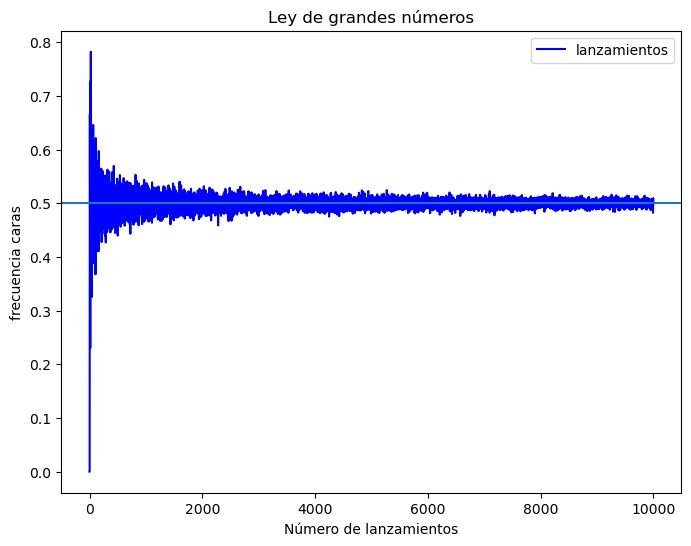

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ejemplo ley de los grandes números
# moneda p=1/2 cara=1 cruz=0
resultados = []
for lanzamientos in range(1,10000):
    lanzamientos = np.random.choice([0,1], lanzamientos) 
    caras = lanzamientos.mean()
    resultados.append(caras)

# graficamente
df = pd.DataFrame({ 'lanzamientos' : resultados})

df.plot(title='Ley de grandes números',color='b',figsize=(8, 6))
plt.axhline(0.5)
plt.xlabel("Número de lanzamientos")
plt.ylabel("frecuencia caras")
plt.show()

Como estos ejemplos nos muestran, al comienzo, la frecuencia en que vamos obteniendo caras va variando considerablemente, pero a medida que aumentamos el número de repeticiones, la frecuencia de caras se va estabilizando en la probabilidad subyacente el evento.


## Teorema Central del Límite

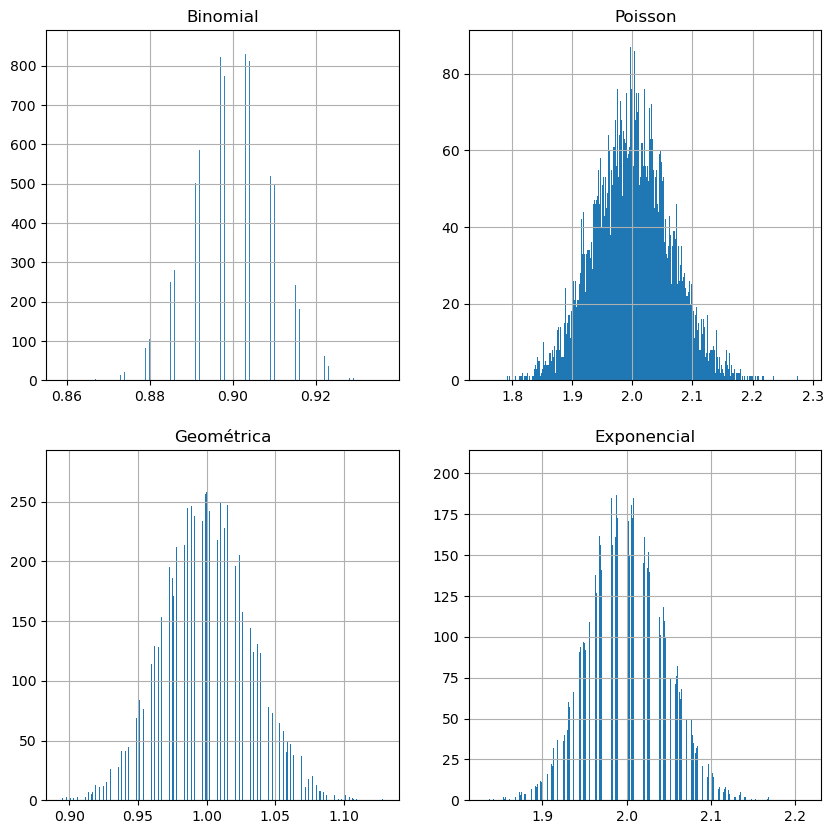

In [2]:
# Ejemplo teorema central del límite 
muestra_binomial = []
muestra_exp = []
muestra_possion = []
muestra_geometric = []
mu = .9
lam = 1.0
size=1000

for i in range(1,20000):
    muestra = np.random.binomial(1, mu, size=size)
    muestra_binomial.append(muestra.mean())
    muestra = np.random.exponential(scale=2.0,size=size)
    muestra_exp.append(muestra.mean())
    muestra = np.random.geometric(p=.5, size=size)
    muestra_geometric.append(muestra.mean())
    muestra = np.random.poisson (lam=lam, size=size)
    muestra_possion.append(muestra.mean()) 

df = pd.DataFrame({ 'binomial' : muestra_binomial, 
                     'poission' : muestra_possion,
                     'geometrica' : muestra_geometric,
                    'exponencial' : muestra_exp})

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
df.binomial.hist(ax=axes[0,0], alpha=0.9, bins=1000)
df.exponencial.hist(ax=axes[0,1],bins=1000)
df.poission.hist(ax=axes[1,0],bins=1000)
df.geometrica.hist(ax=axes[1,1],bins=1000)

axes[0,0].set_title('Binomial')
axes[0,1].set_title('Poisson')
axes[1,0].set_title('Geométrica')
axes[1,1].set_title('Exponencial')
plt.show()



Como nos muestra este ejemplo, al graficar la distribución de las medias de las distribuciones Binomial, Poisson, Geométrica y Exponencial; vemos que todas ellas responden a la famosa forma de campana de la Distribución Normal

## Calcular probabilidades
¿Cuál es la probabilidad de que, en un grupo de personas elegidas al azar, al menos dos de ellas habrán nacido el mismo día del año? ¿Cuántas personas son necesarias para asegurar una probabilidad mayor al 50%?
Excluyendo el 29 de febrero de nuestros cálculos y asumiendo que los restantes 365 días de posibles cumpleaños son igualmente probables, nos sorprendería darnos cuenta de que, en un grupo de sólo 23 personas, la probabilidad de que dos personas compartan la misma fecha de cumpleaños es mayor al 50%

In [3]:
# Ejemplo situación 2 La coincidencia de cumpleaños
prob = 1.0
asistentes = 3

for i in range(asistentes):
    prob = prob * (365-i)/365

print("Probabilidad de que compartan una misma fecha de cumpleaños es {0:.2f}"
      .format(1 - prob))



Probabilidad de que compartan una misma fecha de cumpleaños es 0.01


### muestreo aleatorio simple
Elegimos una m.a.s. de tamaño 150 de una variable aleatoria N(0,1).

In [4]:
from scipy.stats import norm
from numpy import linspace
sample = norm.rvs(loc = 0, scale = 1, size = 150)
print(sample[1:10])

[ 0.19684459 -0.84446007  0.41236332 -0.3991344  -0.08102512  0.81605586
  0.36371316  1.2524371   1.09513942]


Estimamos los parámetros

In [5]:
params = norm.fit(sample)
print("Media = {mu}".format(mu=params[0]))
print("Desviacion tipica = {sd}".format(sd=params[1]))

Media = -0.11463008049875863
Desviacion tipica = 0.9957986046456618


## Muestreo estratificado

In [6]:
import pandas as pd
df=pd.read_csv('C:/Users/U000000/Desktop/EstadDescUCM/MaterialApoyo/gapminder.csv') 
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [7]:
grouped_data=df.groupby('continent')

In [8]:
TamN,aux=df.shape

In [9]:
TamMuestra=100

In [10]:
TamEst1,aux=grouped_data.get_group('Asia').shape
TamEst2,aux=grouped_data.get_group('Europe').shape
TamEst3,aux=grouped_data.get_group('Africa').shape
TamEst4,aux=grouped_data.get_group('Oceania').shape
TamEst5,aux=grouped_data.get_group('Americas').shape

In [11]:
print(TamEst1)
print(TamEst2)
print(TamEst3)
print(TamEst4)
print(TamEst5)

396
360
624
24
300


In [12]:
import math
TamMuestraEst1=math.ceil((TamEst1/TamN)*TamMuestra)
TamMuestraEst2=math.ceil((TamEst2/TamN)*TamMuestra)
TamMuestraEst3=math.ceil((TamEst3/TamN)*TamMuestra)
TamMuestraEst4=math.ceil((TamEst4/TamN)*TamMuestra)
TamMuestraEst5=math.ceil((TamEst5/TamN)*TamMuestra)
print(TamMuestraEst1)
print(TamMuestraEst2)
print(TamMuestraEst3)
print(TamMuestraEst4)
print(TamMuestraEst5)


24
22
37
2
18


In [13]:
MuestraEst1=grouped_data.get_group('Asia').sample(TamMuestraEst1)
MuestraEst2=grouped_data.get_group('Europe').sample(TamMuestraEst2)
MuestraEst3=grouped_data.get_group('Africa').sample(TamMuestraEst3)
MuestraEst4=grouped_data.get_group('Oceania').sample(TamMuestraEst4)
MuestraEst5=grouped_data.get_group('Americas').sample(TamMuestraEst5)
print(MuestraEst1)
print(MuestraEst2)
print(MuestraEst3)
print(MuestraEst4)
print(MuestraEst5)

                 country continent  year  lifeExp        pop     gdpPercap
1651             Vietnam      Asia  1987   62.820   62826491    820.799445
727                 Iran      Asia  1987   63.040   51889696   6642.881371
98            Bangladesh      Asia  1962   41.216   56839289    686.341554
668     Hong Kong, China      Asia  1992   77.601    5829696  24757.603010
855               Kuwait      Asia  1967   64.624     575003  80894.883260
713            Indonesia      Asia  1977   52.702  136725000   1382.702056
1314        Saudi Arabia      Asia  1982   63.012   11254672  33693.175250
698                India      Asia  1962   43.605  454000000    658.347151
732                 Iraq      Asia  1952   45.320    5441766   4129.766056
828     Korea, Dem. Rep.      Asia  1952   50.056    8865488   1088.277758
756               Israel      Asia  1952   65.390    1620914   4086.522128
217             Cambodia      Asia  1957   41.366    5322536    434.038336
1488               Syria 

## Inferencia: intervalo de confianza

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

np.random.seed(20)
var1 = np.random.randint(0, 10, 10) # Días de vacaciones
var2 = var1+np.random.normal(0, 1, 10) # Dinero gastado

In [15]:
# Unimos las variables var1 y var2 (estamos creando un tuple) a partir de zip
tuple = list(zip(var1, var2))
tuple
# Transformamos el tuple a un data frame a partir de DataFrame
tabla = pd.DataFrame(tuple,
                  columns = ['Días_vacaciones', 'Dinero_gastado'])
tabla

,Días_vacaciones,Dinero_gastado
0,3,1.915167
1,9,9.559696
2,4,4.939469
3,6,5.021519
4,7,7.503097
5,2,2.406414
6,0,0.323461
7,6,5.506589
8,8,7.207983
9,5,4.157632


In [16]:
# Calcula los intervalos de confianza a un 95% para ambas variables
st.t.interval(alpha=0.95, df=len(tabla)-1, loc=np.mean(tabla), scale=st.sem(tabla)) 

C:\Users\U000000\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\U000000\AppData\Local\Temp\ipykernel_812\2588612172.py:2: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.t.interval(alpha=0.95, df=len(tabla)-1, loc=np.mean(tabla), scale=st.sem(tabla))


(array([3.00496491, 2.84767315]), array([6.99503509, 6.86053259]))

In [17]:
import numpy as np
import scipy.stats as st

#define datos de muestra
np.random.seed (0)
datos = np.random.randint (10, 30, 50)

#crear un intervalo de confianza del 99% para la misma muestra
st.norm.interval(alpha=0.95,  loc=np.mean(datos), scale=st.sem(datos)) 


C:\Users\U000000\AppData\Local\Temp\ipykernel_812\1109888304.py:9: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.norm.interval(alpha=0.95,  loc=np.mean(datos), scale=st.sem(datos))


(17.400060940568054, 21.079939059431943)